### Predict the fuel efficiency

To predict the fuel efficiency from the given data 

In [1]:
#Import packages
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#import the data 

In [3]:
df  = pd.read_csv('auto-mpg.csv')

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
#Horse power is object need to convert to float


In [7]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [8]:
#Horse power has a '?' value

In [9]:
df['horsepower'].mode()

0    150
Name: horsepower, dtype: object

In [10]:
df['horsepower']= df['horsepower'].replace('?',150)

In [11]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', 150, '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [12]:
#Converting to float

In [13]:
df['horsepower'] = df['horsepower'].astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [15]:
df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [16]:
#Check for missing values

In [17]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [18]:
#No null values

In [19]:
# Checking for duplicate values
df.duplicated().sum()

0

In [20]:
#No duplicate values

In [21]:
#EDA

In [22]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,105.155779,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.600986,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,130.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


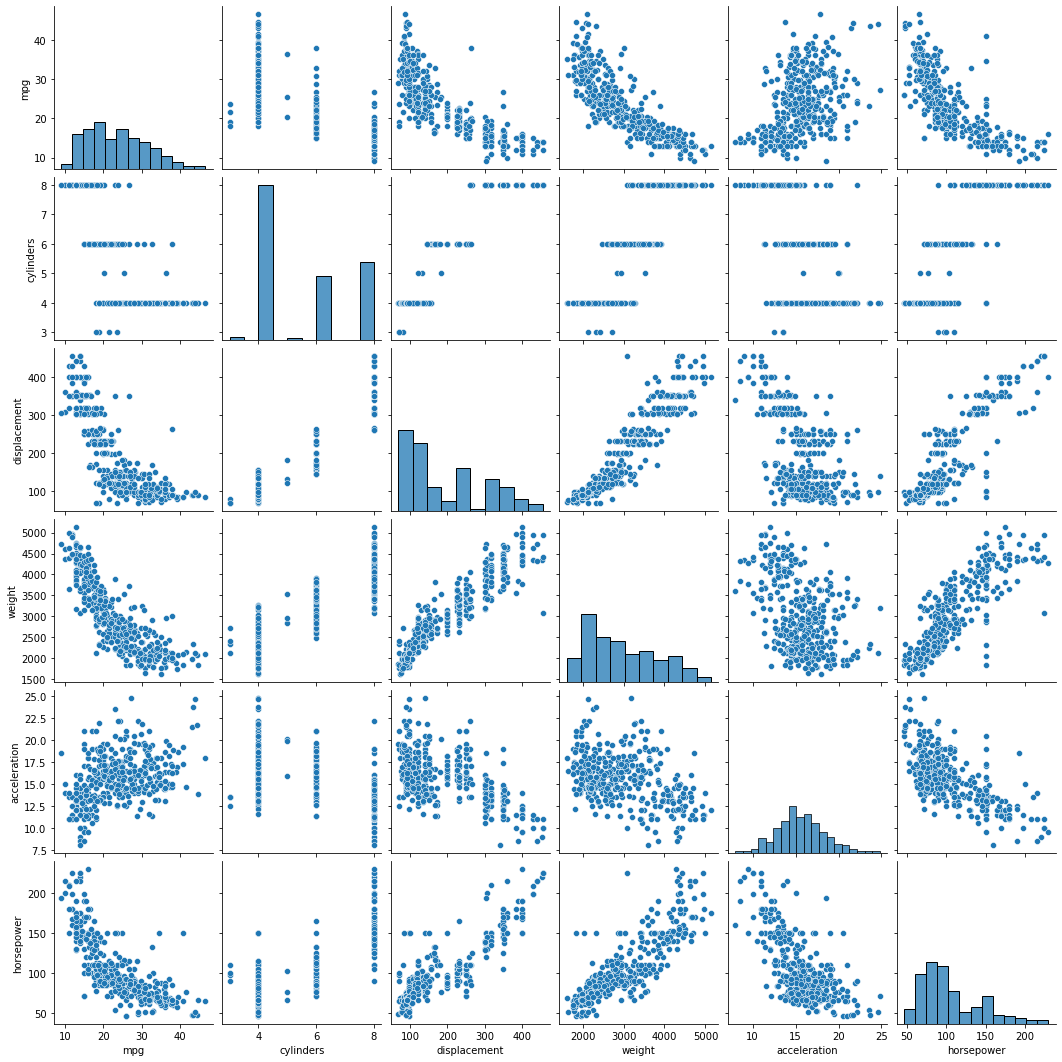

In [23]:

sns.pairplot(df[['mpg','cylinders','displacement','weight','acceleration','horsepower']])

In [24]:
df_pair = df[['mpg','cylinders','displacement','weight','acceleration','horsepower']]

In [25]:
df_cor = df_pair.corr()

<AxesSubplot:>

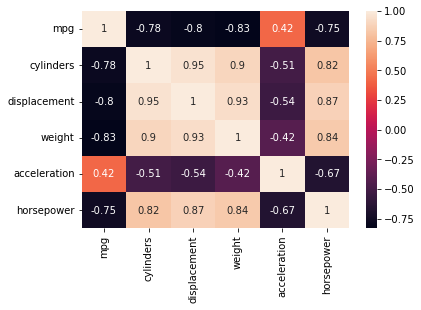

In [26]:
sns.heatmap(df_cor,annot=True)

In [27]:
#good positive corelation between displacement and cylinders | discplacemnt and weight |discplacemnt and horse power
#strong negative corelation between displacement and mpg

In [28]:
#Splitinf test and train data

In [29]:
X = df.drop(columns=['mpg','car name'],axis=1)
y = df['mpg']

In [30]:
X.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

In [31]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.2)

In [32]:
x_train.shape

(318, 7)

In [33]:
x_test.shape

(80, 7)

In [34]:
x_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
303,4,85.0,65.0,2020,19.2,79,3
347,4,85.0,65.0,1975,19.4,81,3
149,4,120.0,97.0,2489,15.0,74,3
100,6,250.0,88.0,3021,16.5,73,1
175,4,90.0,70.0,1937,14.0,75,2
...,...,...,...,...,...,...,...
369,4,112.0,88.0,2395,18.0,82,1
320,4,119.0,92.0,2434,15.0,80,3
15,6,198.0,95.0,2833,15.5,70,1
125,6,198.0,95.0,3102,16.5,74,1


In [35]:
#scaling the data

In [36]:
std = StandardScaler()

In [37]:
x_train_scaled = std.fit_transform(x_train)
x_test_scaled = std.transform(x_test)

In [38]:
x_train_scaled

array([[-0.83948071, -1.03880107, -1.02511442, ...,  1.28224753,
         0.79903108,  1.78651302],
       [-0.83948071, -1.03880107, -1.02511442, ...,  1.3533965 ,
         1.34312504,  1.78651302],
       [-0.83948071, -0.70461924, -0.20087577, ..., -0.21188072,
        -0.56120384,  1.78651302],
       ...,
       [ 0.33912797,  0.04012884, -0.25239069, ..., -0.03400831,
        -1.64939177, -0.71067881],
       [ 0.33912797,  0.04012884, -0.25239069, ...,  0.32173651,
        -0.56120384, -0.71067881],
       [ 1.51773664,  1.18589512,  0.90669491, ..., -0.67434899,
         0.52698409, -0.71067881]])

In [39]:
x_train = pd.DataFrame(data=x_train_scaled,columns=X.columns)

In [40]:
x_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,-0.839481,-1.038801,-1.025114,-1.129758,1.282248,0.799031,1.786513
1,-0.839481,-1.038801,-1.025114,-1.182677,1.353396,1.343125,1.786513
2,-0.839481,-0.704619,-0.200876,-0.578225,-0.211881,-0.561204,1.786513
3,0.339128,0.536628,-0.432693,0.047394,0.321737,-0.833251,-0.710679
4,-0.839481,-0.991061,-0.896327,-1.227364,-0.567626,-0.289157,0.537917
...,...,...,...,...,...,...,...
313,-0.839481,-0.781004,-0.432693,-0.688767,0.855354,1.615172,-0.710679
314,-0.839481,-0.714167,-0.329663,-0.642904,-0.211881,1.071078,1.786513
315,0.339128,0.040129,-0.252391,-0.173690,-0.034008,-1.649392,-0.710679
316,0.339128,0.040129,-0.252391,0.142648,0.321737,-0.561204,-0.710679


In [41]:
x_test = pd.DataFrame(data=x_test_scaled,columns=X.columns)

In [42]:
x_test

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,-0.839481,-0.924224,-0.973600,-0.982761,0.855354,1.071078,1.786513
1,-1.428785,-1.182022,-0.381178,-1.007457,-0.745498,-0.833251,1.786513
2,-0.839481,-0.847840,-1.076629,-0.900443,-0.247455,1.343125,-0.710679
3,-0.839481,-0.924224,-0.767540,-0.971002,0.286162,-0.017110,1.786513
4,-0.839481,-0.981513,-0.896327,-1.206197,1.744716,-1.377345,-0.710679
...,...,...,...,...,...,...,...
75,-0.839481,-0.981513,-0.922085,-1.000401,-0.318604,0.799031,0.537917
76,1.517737,1.061770,0.906695,1.451510,-0.923370,-0.017110,-0.710679
77,1.517737,1.033126,0.623363,0.221439,-1.279115,-0.289157,-0.710679
78,1.517737,1.185895,1.164269,1.357432,-0.745498,-1.105298,-0.710679


In [43]:
#Model building 

In [44]:
len(x_train.columns)

7

In [45]:
model = Sequential()

In [46]:
model.add(Dense(64,input_dim = 7,activation ='relu'))
model.add(Dense(64,activation ='relu'))
model.add(Dense(1))

In [47]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error', 'mean_squared_error'])

In [48]:
model.fit(x_train,y_train,batch_size=10, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 566.4264 - mean_absolute_error: 22.5173 - mean_squared_error: 566.4264
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 395.0296 - mean_absolute_error: 18.4826 - mean_squared_error: 395.0296
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 152.5078 - mean_absolute_error: 10.6521 - mean_squared_error: 152.5078
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 47.0140 - mean_absolute_error: 5.5463 - mean_squared_error: 47.0140
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 32.9750 - mean_absolute_error: 4.5472 - mean_squared_error: 32.9750
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 24.4014 - mean_absolute_error: 3.8462 - mean_squared_error: 24.4014
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 19.0826 - mean_absolute_error: 3.3695 - mean_squared_error: 19.0826
Epoc

32/32 [==============================] - 0s 3ms/step - loss: 5.7559 - mean_absolute_error: 1.6812 - mean_squared_error: 5.7559
Epoch 60/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9646 - mean_absolute_error: 1.7186 - mean_squared_error: 5.9646
Epoch 61/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7124 - mean_absolute_error: 1.6698 - mean_squared_error: 5.7124
Epoch 62/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7763 - mean_absolute_error: 1.6891 - mean_squared_error: 5.7763
Epoch 63/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6162 - mean_absolute_error: 1.6611 - mean_squared_error: 5.6162
Epoch 64/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7536 - mean_absolute_error: 1.7131 - mean_squared_error: 5.7536
Epoch 65/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7827 - mean_absolute_error: 1.6854 - mean_squared_error: 5.7827
Epoch 66/100
32/32 [=============

In [50]:
y_predict  = model.predict(x_test)

3/3 [==============================] - 0s 3ms/step


In [51]:
from sklearn.metrics import mean_absolute_error

In [53]:
mae = mean_absolute_error(y_test,y_predict)
mae

2.1703395748138425

In [54]:
# Conclusion 
# Model bulild with an mean absolute error of 2.17 while predicting 

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________
